In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
train_data.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


# **Text normalization**

In [4]:
import re
def remove_between_square_brackets(text, remove_digits=True):
      return re.sub('\[[^]]*\]', '', text)

def remove_special_characters(text, remove_digits=True):
      pattern=r'[^a-zA-z0-9\s]'
      text=re.sub(pattern,'',text) 
      return text


In [5]:
train_data['text'] = train_data['text'].apply(remove_special_characters)
train_data['text'] = train_data['text'].apply(remove_between_square_brackets)
test_data['text'] = test_data['text'].apply(remove_special_characters)
test_data['text'] = test_data['text'].apply(remove_between_square_brackets)


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(train_data['text'],train_data['target'], test_size=0.3)


In [7]:
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        return [self.wnl.lemmatize(t) for t in word_tokenize(articles)]

# **Tokenization**

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english' , ngram_range=(1,1),tokenizer=LemmaTokenizer())
vectorizer.fit(X_train)
#vectorizer.get_feature_names_out()
x_train=vectorizer.transform(X_train)
x_test=vectorizer.transform(X_test)
test_vectors = vectorizer.transform(test_data["text"])

C:\Users\henri_m9qs9bn\miniconda3\envs\kaggle\lib\site-packages\sklearn\feature_extraction\text.py:516: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\henri_m9qs9bn\miniconda3\envs\kaggle\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [9]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(x_train, Y_train)

In [10]:
predict = clf.predict(x_test)


In [11]:
from sklearn.metrics import accuracy_score , confusion_matrix
accuracy_score(Y_test,predict)

0.7924693520140105

# ***Model Evaluation***

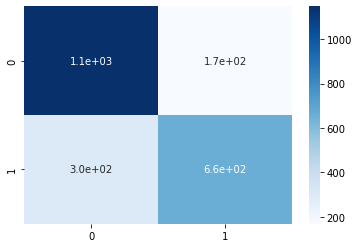

In [12]:
import seaborn as sns

cf_matrix = confusion_matrix(Y_test, predict)
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')



In [13]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, predict))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1317
           1       0.80      0.68      0.74       967

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.78      2284
weighted avg       0.79      0.79      0.79      2284



In [14]:
sub = pd.read_csv('sample_submission.csv')

In [15]:
sub["target"] = clf.predict(test_vectors)
sub.head()


,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [16]:
sub.to_csv("submission.csv", index=False)


In [17]:
pd.read_csv('submission.csv')

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1
